# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Predictions Infox - Comparaison Bag of Words

---

### Conseils JW
- Utiliser la courbe de ROC : superposition, et calcul de l'intégrale Area under curve = AUC
- Faire varier le seuil pour accuracy/recall/f1. La courbe de ROC résume tout ça.
- Essayer Naive Bayes avec distribution de Poisson
- Refaire un benchmark
- Faire des opérations de réduction de dimensions SVD sur le BoW `sklearn.decomposition.TruncatedSVD`
- Réseau de neurones : faire petit, metrique AUC
- Word Embedings : https://fasttext.cc/docs/en/crawl-vectors.html


# Observations et environnement
---

In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [2]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Paramètres globaux

In [3]:
random_state = 42

## Données d'entrainement

In [4]:
df_texts_recueil = pd.read_csv('data/demo/221123-TextInfox.csv')

In [5]:
df_texts_recueil

,url,infox,title,article,text
0,https://actu.fr/faits-divers/quatre-morts-dans...,0.0,Quatre morts dans un accident de la route sur ...,"Quatre personnes sont décédées, et une autre a...",Quatre morts dans un accident de la route sur ...
1,https://www.francetvinfo.fr/economie/budget/co...,0.0,Consommation : les Français boudent les distri...,Les distributeurs de billets vont-ils un jour ...,Consommation : les Français boudent les distri...
2,https://www.francetvinfo.fr/sante/contraceptio...,0.0,Avortement : le choix des Irlandais,"En Irlande, lors du référendum, les électeurs ...",Avortement : le choix des Irlandais\nEn Irland...
3,https://www.francesoir.fr/culture-celebrites/u...,0.0,Une ex de Cristiano Ronaldo compare porno et t...,Elle avait mis un pied dans le monde de la tél...,Une ex de Cristiano Ronaldo compare porno et t...
4,https://www.francesoir.fr/afp-afp-france/levee...,0.0,"Levée du statut de détenu signalé de Colonna, ...",Le Premier ministre Jean Castex a levé mardi l...,"Levée du statut de détenu signalé de Colonna, ..."
...,...,...,...,...,...
606,https://www.wikistrike.com/2022/09/11-septembr...,1.0,11 septembre 2001 : La théorie du « complot pi...,Le 11 septembre pour les nuls\nEst-il vrai que...,11 septembre 2001 : La théorie du « complot pi...
607,https://www.wikistrike.com/2022/10/selon-un-an...,1.0,"Selon un ancien conseiller du Pentagone, les É...","Selon un ancien conseiller du Pentagone, les c...","Selon un ancien conseiller du Pentagone, les É..."
608,https://www.wikistrike.com/2022/10/la-pologne-...,1.0,La Pologne s’apprête à s’emparer du territoire...,La Pologne se prépare à s’emparer du territoir...,La Pologne s’apprête à s’emparer du territoire...
609,https://www.wikistrike.com/2022/11/exclusivite...,1.0,Exclusivité WikiStrike: un physicien en colère...,"Crise énergétique battant son plein, WikiStri...",Exclusivité WikiStrike: un physicien en colère...


In [6]:
df_texts_afp =  pd.read_csv('data/tmp/221118-TextsAfp.csv')

In [7]:
df_texts_afp

,url,text,infox
0,https://www.francesoir.fr/politique-monde/pres...,Présidentielle au Brésil: Bolsonaro talonne Lu...,0.0
1,https://www.francesoir.fr/politique-france/la-...,La France lance un plan de sobriété énergétiqu...,0.0
2,https://www.francesoir.fr/politique-monde/mani...,Manifestations des femmes en Iran contre le po...,0.0
3,https://www.francesoir.fr/politique-france/aff...,Affaire Quatennens: LFI sous la pression de la...,0.0
4,https://www.francesoir.fr/politique-monde/covi...,"Covid-19: pour Joe Biden, ""la pandémie est ter...",0.0
...,...,...,...
3232,https://www.francesoir.fr/lifestyle-gastronomi...,La deuxième vie des coquilles d'huîtres\nLes h...,0.0
3233,https://www.francesoir.fr/lifestyle-gastronomi...,La truffe se fait rare\nVictime du réchauffeme...,0.0
3234,https://www.francesoir.fr/lifestyle-gastronomi...,Rungis prépare un Noël opulent malgré les atte...,0.0
3235,https://www.francesoir.fr/lifestyle-gastronomi...,Gastronomie: le Franco-Suisse Benoît Violier m...,0.0


In [8]:
with open('data/tmp/221110-IgnoreLemmas.txt','r') as file:
    ignore_words = file.read().split()

In [9]:
print(ignore_words[:100])
print(len(ignore_words))

['de', 'la', 'le', 'les', 'et', 'des', 'en', 'un', 'du', 'est', 'une', 'que', 'être', 'avoir', 'pour', 'dans', 'qui', 'il', 'par', 'sur', 'au', 'pas', 'ce', 'plaire', 'faire', 'ne', 'qu', 'pouvoir', 'se', 'avec', 'tout', 'ou', 'été', 'son', 'mais', 'aux', 'cette', 'on', 'nous', 'comme', 'elle', 'même', 'autre', 'devoir', 'ces', 'pays', 'leur', 'si', 'sa', 'ses', 'bien', 'état', 'contre', 'ils', 'vous', 'sans', 'voir', 'je', 'après', 'deux', 'depuis', 'mettre', 'russie', 'monde', 'entre', 'grand', 'an', 'dire', 'covid', 'invitant', 'guéguen', 'patiemment', 'méditation', 'eda', 'perdurer', 'inversement', 'guedj', 'penn', 'kang', 'officieux', 'jurisprudence', 'kant', 'hectare', 'islamisation', 'hebdo', 'guichard', 'entente', 'guihard', 'pepe', 'duel', 'haïr', 'naufrage', 'ironiquement', 'olivennes', 'juvénile', 'inégal', 'patois', 'justifiant', 'echos', 'jacky']
15203


In [10]:
df_words = pd.read_csv('data/prod/221125-InfoxWords.csv',index_col=0)

In [11]:
df_words

,count_0,count_1,count,rare_1,rare_2,rare_3,rare_4,rare_5,rare_6,rare_7,common_50,common_80,common_120,common_200,common_500
de,114412,23980,138392,False,False,False,False,False,False,False,True,True,True,True,True
la,63402,12901,76303,False,False,False,False,False,False,False,True,True,True,True,True
le,49361,9921,59282,False,False,False,False,False,False,False,True,True,True,True,True
et,38704,10142,48846,False,False,False,False,False,False,False,True,True,True,True,True
les,38053,10363,48416,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mayr,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
mazari,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
maçonnique,0,2,2,False,True,True,True,True,True,True,False,False,False,False,False
maïté,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False


In [12]:
ignore_words_small = list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_1']].index)
ignore_words_medium = list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_2']].index)
ignore_words_large = list(df_words[df_words['common_200']].index)+list(df_words[df_words['rare_5']].index)

In [13]:
common_80 = list(df_words[df_words['common_80']].index)
common_200 = list(df_words[df_words['common_200']].index)

In [14]:
ignore_words_large.sort()
ignore_words_large

['aae',
 'aag',
 'aah',
 'aaliyah',
 'aalto',
 'aanes',
 'aaph',
 'aapp',
 'aaraje',
 'aardal',
 'aarmement',
 'aasland',
 'aatip',
 'aaz',
 'ab',
 'abad',
 'abadie',
 'abaisse',
 'abascal',
 'abasi',
 'abasourdi',
 'abassiya',
 'abattant',
 'abatteur',
 'abaya',
 'abayas',
 'abayisenga',
 'abballa',
 'abbasi',
 'abbatial',
 'abbatucci',
 'abbeville',
 'abbie',
 'abbot',
 'abby',
 'abc',
 'abcd',
 'abcès',
 'abdallah',
 'abdelafid',
 'abdelatif',
 'abdelhady',
 'abdelhakim',
 'abdelkarim',
 'abdelmadjid',
 'abdelmajid',
 'abdelmoumen',
 'abdelsalam',
 'abdelshakour',
 'abdelwahab',
 'abderahmen',
 'abderaman',
 'abderrahmane',
 'abdessemed',
 'abdi',
 'abdication',
 'abdiquer',
 'abdiwahab',
 'abdul',
 'abdulaziz',
 'abdullah',
 'abdullahi',
 'abe',
 'abeba',
 'abed',
 'abedi',
 'abeer',
 'abeiku',
 'abell',
 'aber',
 'aberdeen',
 'aberkane',
 'aberouz',
 'aberrant',
 'abertzaleen',
 'abessia',
 'abgrall',
 'abhorrer',
 'abid',
 'abidi',
 'abidine',
 'abidjanais',
 'abigaïlle',
 'abili

In [15]:
len(ignore_words_large)

39866

# Experience
---

## Feature Engineering

### Preprocessor

In [16]:
import patat.util.text

importlib.reload(patat.util.text)
preprocessor = patat.util.text.preprocess
#preprocessor=None

### Tokenizer

In [17]:
from patat.ml.lex_analyser import LexAnalyser

lex = LexAnalyser()

tokenizer = lex.get_lemmas_from_text

### TfIdfVectorizer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
#afp_size = 3000
#afp_size = 120
afp_size = 20
#afp_size = 0
df_ml = pd.concat([df_texts_recueil,df_texts_afp.sample(afp_size,random_state=random_state)])

In [48]:
%%time
stop_words = ignore_words_large
vectorizer = TfidfVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=stop_words)
#vectorizer = CountVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=stop_words)
count_matrix = vectorizer.fit_transform(df_ml['text'])
count_array = count_matrix.toarray()
df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
df_tf.shape

df_X = df_tf
X = df_X

len(df_X.keys())

/Users/fm/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aboutir', 'affilier', 'agir', 'ambitieux', 'assourdir', 'astreindre', 'attraire', 'atténuer', 'automatiser', 'aviser', 'bail', 'bau', 'boire', 'bondir', 'braiser', 'bâtir', 'bénir', 'caractériser', 'chiner', 'circonstancier', 'converger', 'coordonner', 'cristalliser', 'croire', 'cuire', 'cuver', 'différer', 'décrier', 'déculotter', 'déplaire', 'désemparer', 'enrichir', 'envahir', 'fermer', 'glacer', 'granuler', 'généraliser', 'hirondeau', 'inclure', 'industrialiser', 'instruire', 'lyophiliser', 'maudire', 'menacer', 'miner', 'nourrir', 'nébuleux', 'obéir', 'paver', 'personnaliser', 'plafonner', 'plomber', 'rafraîchir', 'ravir', 'redécouvrir', 'remplacer', 'réfléchir', 'réformer', 'spécifier', 'stabiliser', 'structurer', 'subir', 'subventionner', 'séduire', 'tripler', 'veiller', 

CPU times: user 540 ms, sys: 23.4 ms, total: 563 ms
Wall time: 577 ms


11493

## Benchmark Sklearn

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import metrics
#from sklearn.metrics import roc_curve

In [50]:
#X = df_X
y=df_ml['infox']

In [51]:
df_X.shape

(631, 11493)

### Initialisations

In [52]:
train_size=0.8
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=random_state,train_size=train_size)

In [53]:
def print_metrics(y_train, y_test, y_pred):
    print(f'Train size \t{len(y_train)} = {int(len(y_train)-y_train.sum())} False + {int(y_train.sum())} True' )
    print(f'Test size \t{len(y_test)} = {int(len(y_test)-y_test.sum())} False + {int(y_test.sum())} True\n' )
    print(f'Accuracy score \t{metrics.accuracy_score(y_test, y_pred)*100:.2f}%')
    print(f'Recall score \t{metrics.recall_score(y_test, y_pred)*100:.2f}%')
    print(f'F1 score \t{metrics.f1_score(y_test, y_pred)*100:.2f}%')
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred,normalize='all')
    print(f'False Positive \t{cnf_matrix[0,1]*100:.2f}%')
    print(f'False Negative \t{cnf_matrix[1,0]*100:.2f}%\n')    

### Benchmark

In [54]:
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

In [55]:
results =[]
def push_metrics(name, clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    print('------------------------------------')
    print(f'Classifier : {name}')
    acc = metrics.accuracy_score(y_test, y_pred)
    print(f'Accuracy score {acc*100:.2f}%')
    recall = metrics.recall_score(y_test, y_pred)
    print(f'Recall score {recall*100:.2f}%')
    results.append({
        'Classifier' : name,
        'Accuracy' : round(acc*100),
        'Recall' : round(recall*100),
    })
    print('------------------------------------')

In [58]:
names = [
    'Dummy',
    "Logistic Regression",
#    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    DummyClassifier(strategy='uniform', random_state=random_state),
    LogisticRegression(C=100.0, random_state=random_state, solver='lbfgs', multi_class='ovr', max_iter=1000),
#    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True, random_state=random_state),
    SVC(gamma=2, C=1, probability=True, random_state=random_state),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=random_state),
    DecisionTreeClassifier(max_depth=5, random_state=random_state),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=random_state),
    MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(8,8), random_state=random_state),
    AdaBoostClassifier(random_state=random_state),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.75)
y_preds = {}
y_probas = {}

for name, classifier in zip(names, classifiers):
    print(name)
    classifier.fit(X_train, y_train)
    y_preds[name] = classifier.predict(X_test)
    y_probas[name] = classifier.predict_proba(X_test)
    

Dummy
Logistic Regression
Linear SVM
RBF SVM
Gaussian Process
Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA


/Users/fm/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


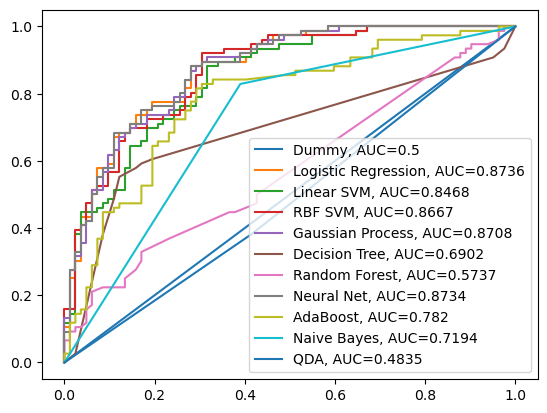

In [60]:
plt.figure(0).clf()
for name in y_probas.keys():
    y_proba = y_probas[name][:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_proba)
    auc = round(metrics.roc_auc_score(y_test, y_proba), 4)
    plt.plot(fpr,tpr,label=f"{name}, AUC={auc}")
plt.legend()

# Sauvegarde des résultats
---

# Conclusions
---

- 

# Bricolages
---

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [ ]:
tf.config.list_physical_devices()

In [ ]:
tf.device("/CPU:0")

In [ ]:
tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/GPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Run on the GPU
c = tf.matmul(a, b)
print(c)

In [ ]:
tf.debugging.set_log_device_placement(True)

In [ ]:
tf.config.list_physical_devices('GPU')

In [ ]:
df_words['word']=df_words.index

In [ ]:
df_words['c_count']=df_words['word'].apply(len)

In [ ]:
df_words.sort_values('c_count',ascending=False).head(30)

In [ ]:
classifier.strategy

In [ ]:
str(type(classifier))